In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
plt.style.use("default")
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

# === Load labels from CSV ===
df = pd.read_csv("data/cancer_data_preprocessed.csv")
print(df.shape)
print(df.columns)
print(df['Cancer Stage'].unique())
y = df['Cancer Stage'].values

(38258, 10)
Index(['mutated_protein', 'wildtype_protein', 'Donor Age at Diagnosis',
       'Donor Sex', 'Tumour Grade', 'Donor Vital Status',
       'Donor Survival Time', 'Cancer Type', 'Histology Abbreviation',
       'Cancer Stage'],
      dtype='object')
[2 3 4 1]


In [ ]:
print(df['mutated_protein'].str.len().describe())

count    38258.000000
mean      1149.174081
std       2677.216104
min          6.000000
25%        350.000000
50%        644.000000
75%       1160.000000
max      35992.000000
Name: mutated_protein, dtype: float64


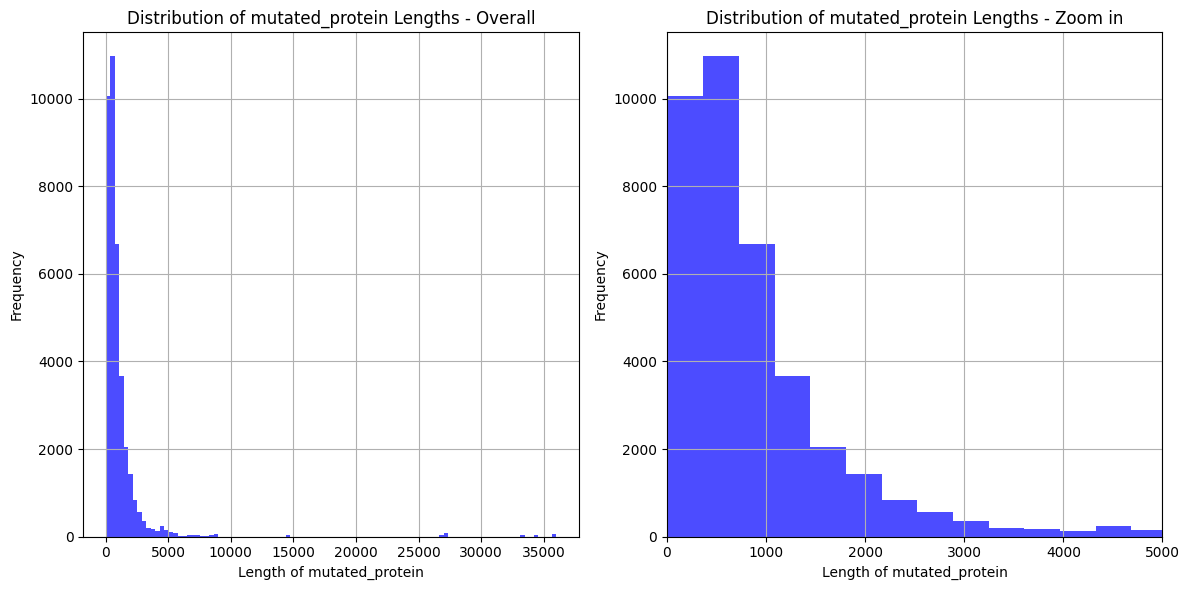

In [11]:
# 绘制mutated_protein长度分布图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['mutated_protein'].str.len(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of mutated_protein Lengths - Overall')
plt.xlabel('Length of mutated_protein')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(df['mutated_protein'].str.len(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of mutated_protein Lengths - Zoom in')
plt.xlim(0, 5000)
plt.xlabel('Length of mutated_protein')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

In [2]:
path_finetuned = "data/finetuned_delta_embeddings.pt"
path_original = "data/esm2_delta_embeddings.pt"  # optional

finetuned = torch.load(path_finetuned)
original = torch.load(path_original)  # optional
X_ft = finetuned["X"].numpy()
X_orig = original["X"].numpy()  # optional
print(X_ft.shape)
print(X_orig.shape)  # optional

(7652, 320)
(38258, 320)


In [3]:
path_original = "data/esm2_delta_embeddings.pt"  
embeddings = torch.load(path_original)
# shape print
print(embeddings["X"].shape)

torch.Size([38258, 1, 1280])
